In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

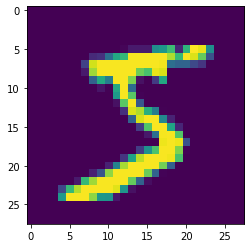

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train=X_train/255
X_test=X_test/255

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [7]:
encoder=Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [8]:
decoder=Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [9]:
autoencoder=Sequential([encoder,decoder])

In [10]:
autoencoder.compile(loss='binary_crossentropy',optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [11]:
autoencoder.fit(X_train,X_train,epochs=10,validation_data=(X_test,X_test))

Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2488 - accuracy: 0.0879 - val_loss: 0.2081 - val_accuracy: 0.1262
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1899 - accuracy: 0.1568 - val_loss: 0.1761 - val_accuracy: 0.1822
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1607 - accuracy: 0.1964 - val_loss: 0.1574 - val_accuracy: 0.1883
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1482 - accuracy: 0.2129 - val_loss: 0.1452 - val_accuracy: 0.2137
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1422 - accuracy: 0.2222 - val_loss: 0.1400 - val_accuracy: 0.2237
Epoch 6/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1373 - accuracy: 0.2280 - val_loss: 0.1357 - val_accuracy: 0.2300
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1315 - accuracy: 0.2343 - val_loss: 0.1263 -

In [12]:
passed_image=autoencoder.predict(X_test[:10])

original image


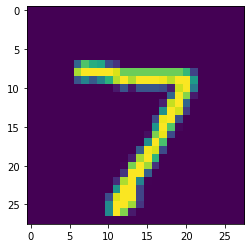

outencoder image


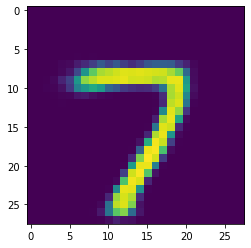

In [13]:
n=0
print('original image')
plt.imshow(X_test[n])
plt.show()
print('outencoder image')
plt.imshow(passed_image[n])

In [14]:
from tensorflow.keras.layers import GaussianNoise

In [15]:
sample=GaussianNoise(0.2)

In [16]:
noisy=sample(X_test[:10],training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



original


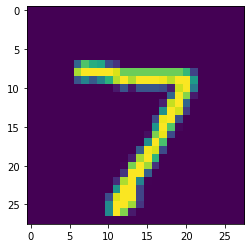

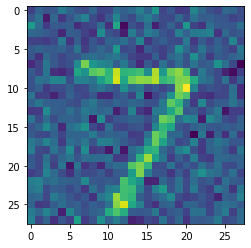

In [17]:
n=0
print('original')
plt.imshow(X_test[n])
plt.show()
plt.imshow(noisy[n])

In [18]:
import tensorflow as tf

In [19]:
tf.random.set_seed(101)
np.random.seed(101)
encoder=Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [20]:
decoder=Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [21]:
noise_remover=Sequential([encoder,decoder])
noise_remover.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
noise_remover.fit(X_train,X_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1691 - accuracy: 0.1827
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1292 - accuracy: 0.2319
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1201 - accuracy: 0.2469
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1146 - accuracy: 0.2580
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1112 - accuracy: 0.2644
Epoch 6/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1084 - accuracy: 0.2695
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1062 - accuracy: 0.2737
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1044 - accuracy: 0.2759
Epoch 9/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1031 - accuracy: 0.2785
Epoch 10/10
1875/1875 [==============================] - 21s 11m

In [23]:
ten_noise=sample(X_test[:10],training=True)

In [24]:
denoised=noise_remover(ten_noise)

origonal image


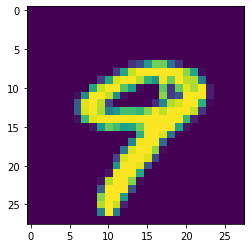

noise image


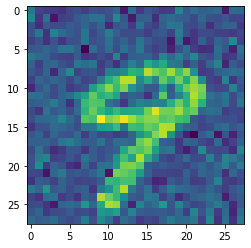

denoise image


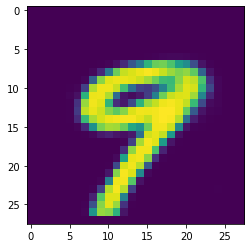

In [25]:
n=9
print('origonal image')
plt.imshow(X_test[n])
plt.show()
print('noise image')
plt.imshow(ten_noise[n])
plt.show()
print('denoise image')
plt.imshow(denoised[n])
plt.show()